## Temperature plot

In [1]:
%matplotlib inline

In [2]:
import datetime
import numpy
import numpy as np
import pylab
from matplotlib.dates import date2num
from pysurvey.plot import setup, dateticks, hcolorbar, line, icolorbar, minmax, embiggen

In [3]:
hostname = !hostname
assert hostname[0] == 'chargino', 'This is a computer specific notebook'

In [4]:
def format_temp(x):
    return float(x.replace('\xc2\xb0C',''))
def format_date(x):
    return date2num(datetime.datetime.fromtimestamp(int(x)))
data = numpy.genfromtxt('/Users/ajmendez/data/.templog.chargino.dat',
                        converters={0:format_date,
                                    1:format_temp},
                        names=['date','temp'],
#                         dtype=[('date', np.float64),
#                                ('temp', np.float64)],
                        )

/Users/ajmendez/.local/canopy/User/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


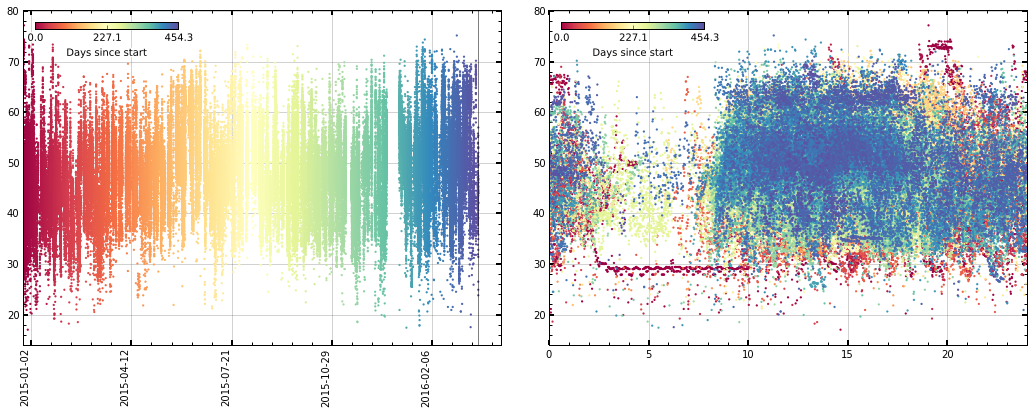

In [5]:
setup(figsize=(18,6), subplt=(1,2,1), 
      xr=embiggen(minmax(data['date']), [0,0.05]),
      )
# pylab.plot(data['date'], data['temp'], '.')
sc = pylab.scatter(data['date'], data['temp'], c=data['date']-np.min(data['date']), 
              marker='.', edgecolor='none', label='Days since start',
              cmap=pylab.cm.Spectral)
icolorbar(sc)
pylab.axvline(date2num(datetime.datetime.now()), color='k', alpha=0.5)


# dateticks('%Y-%m-%d %H:%M')
dateticks('%Y-%m-%d', rotation=90)
setup(subplt=(1,2,2), xr=[0,24])
tmp = (data['date']%1)*24.0
sc = pylab.scatter(tmp, data['temp'], c=data['date']-np.min(data['date']), 
              marker='.', edgecolor='none', label='Days since start',
              cmap=pylab.cm.Spectral)
# hcolorbar(sc, axes=[0.7, 0.99, 0.1,0.02])
_ = icolorbar(sc)

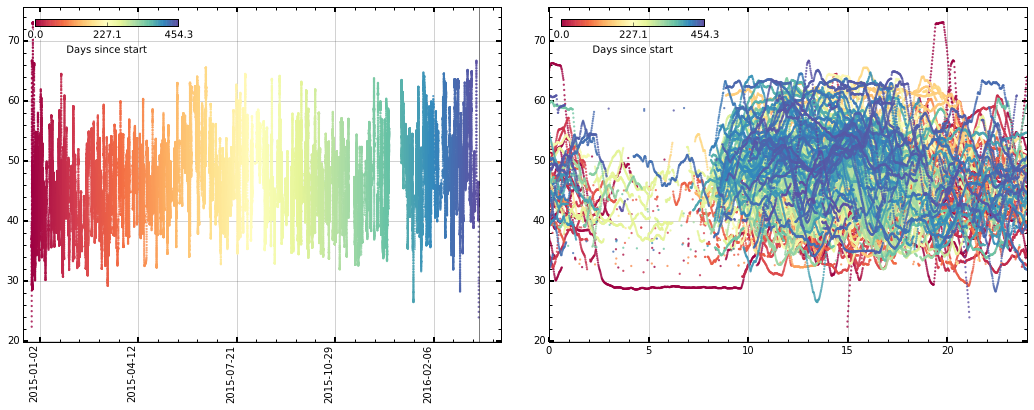

In [6]:
nsmooth = 51
setup(figsize=(18,6), subplt=(1,2,1), 
      xr=embiggen(minmax(data['date']), [0.02,0.05]))
sc = pylab.scatter(data['date'], np.convolve(np.ones(nsmooth)/nsmooth, data['temp'], mode='same'), 
                   c=data['date']-np.min(data['date']), 
                   marker='.', edgecolor='none', alpha=0.8,
                   label='Days since start',
                   cmap=pylab.cm.Spectral)
icolorbar(sc)
pylab.axvline(date2num(datetime.datetime.now()), color='k', alpha=0.5)


# dateticks('%Y-%m-%d %H:%M')
dateticks('%Y-%m-%d', rotation=90)
setup(subplt=(1,2,2), xr=[0,24])
tmp = (data['date']%1)*24.0
sc = pylab.scatter(tmp, np.convolve(np.ones(nsmooth)/nsmooth, data['temp'], mode='same'), 
                   c=data['date']-np.min(data['date']), alpha=0.8,
                   marker='.', edgecolor='none', label='Days since start',
                   cmap=pylab.cm.Spectral)
# hcolorbar(sc, axes=[0.7, 0.99, 0.1,0.02])
_ = icolorbar(sc)

In [7]:
dates, uptimes = [],[]
with open('/Users/ajmendez/data/.uptime.chargino.dat', 'r') as f:
    for line in f.readlines():
        dates.append(format_date(line.split(' ')[0]))
        uptimes.append(float(line.split(':')[-1].split(' ')[1]))
dates, uptimes = map(np.array, [dates, uptimes])

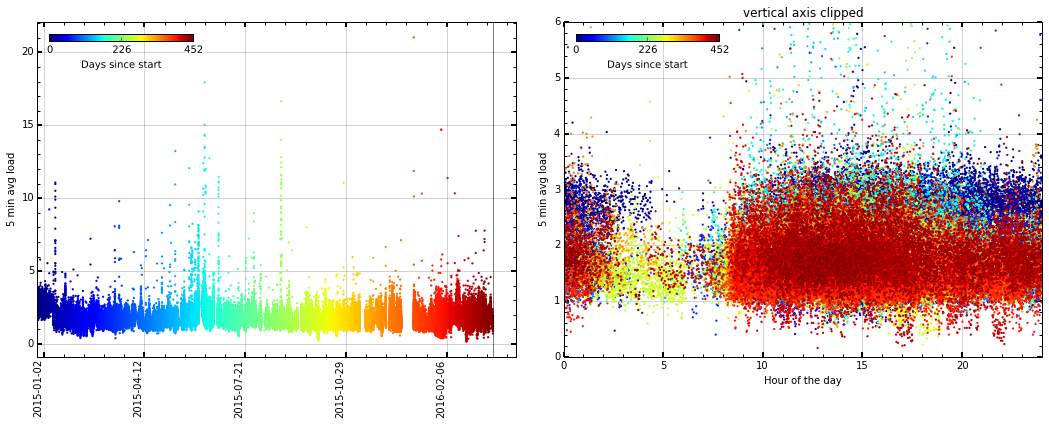

In [8]:
setup(figsize=(18,6), subplt=(1,2,1),
      xr=embiggen(minmax(dates), [0,0.05]),
      ylabel='5 min avg load')
# pylab.plot(data['date'], data['temp'], '.')
sc = pylab.scatter(dates, uptimes, c=dates-np.min(dates), 
              marker='.', edgecolor='none', label='Days since start')
icolorbar(sc)
pylab.axvline(date2num(datetime.datetime.now()), color='k', alpha=0.5)

# dateticks('%Y-%m-%d %H:%M')
dateticks('%Y-%m-%d', rotation=90)

setup(subplt=(1,2,2), xr=[0,24], yr=[0,6], 
      title='vertical axis clipped',
      xlabel='Hour of the day',
      ylabel='5 min avg load')
tmp = (dates%1)*24.0
sc = pylab.scatter(tmp, uptimes, c=dates-np.min(dates), 
              marker='.', edgecolor='none', label='Days since start')
# hcolorbar(sc, axes=[0.7, 0.99, 0.1,0.02])
_ = icolorbar(sc)

In [9]:
nsmooth = 50.0
suptimes = np.convolve(np.ones(nsmooth)/nsmooth, uptimes, mode='same')

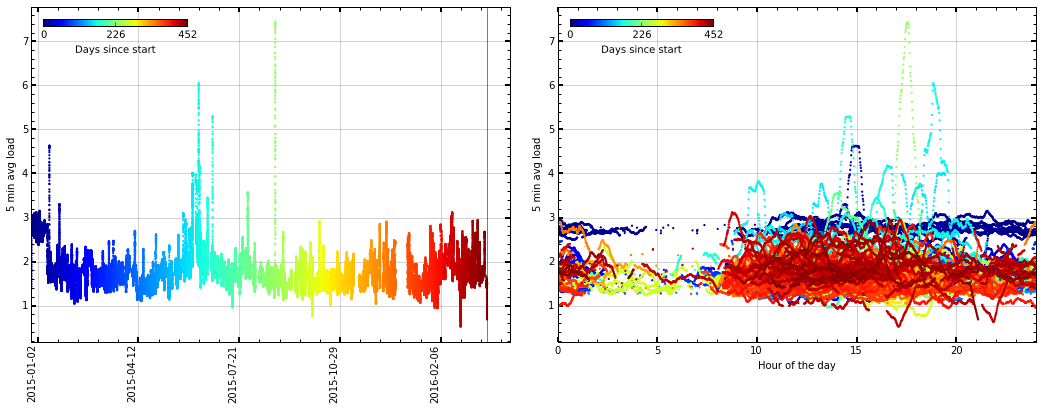

In [10]:

setup(figsize=(18,6), subplt=(1,2,1),
      xr=embiggen(minmax(dates), [0,0.05]),
      ylabel='5 min avg load')
sc = pylab.scatter(dates, suptimes, 
                   c=dates-np.min(dates), marker='.', edgecolor='none', label='Days since start')
icolorbar(sc)
pylab.axvline(date2num(datetime.datetime.now()), color='k', alpha=0.5)

# dateticks('%Y-%m-%d %H:%M')
dateticks('%Y-%m-%d', rotation=90)

setup(subplt=(1,2,2), xr=[0,24], 
      xlabel='Hour of the day',
      ylabel='5 min avg load')
tmp = (dates%1)*24.0
sc = pylab.scatter(tmp, suptimes, c=dates-np.min(dates), 
              marker='.', edgecolor='none', label='Days since start')
# hcolorbar(sc, axes=[0.7, 0.99, 0.1,0.02])
_ = icolorbar(sc)